In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

In [122]:
data = pd.read_csv("spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [123]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [124]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [125]:
data.drop([data.columns[col] for col in [2, 3, 4]], axis=1, inplace=True)

In [126]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
data.columns = ['label', 'text']
data.drop_duplicates(keep='first', inplace=True)
data.shape

(5169, 2)

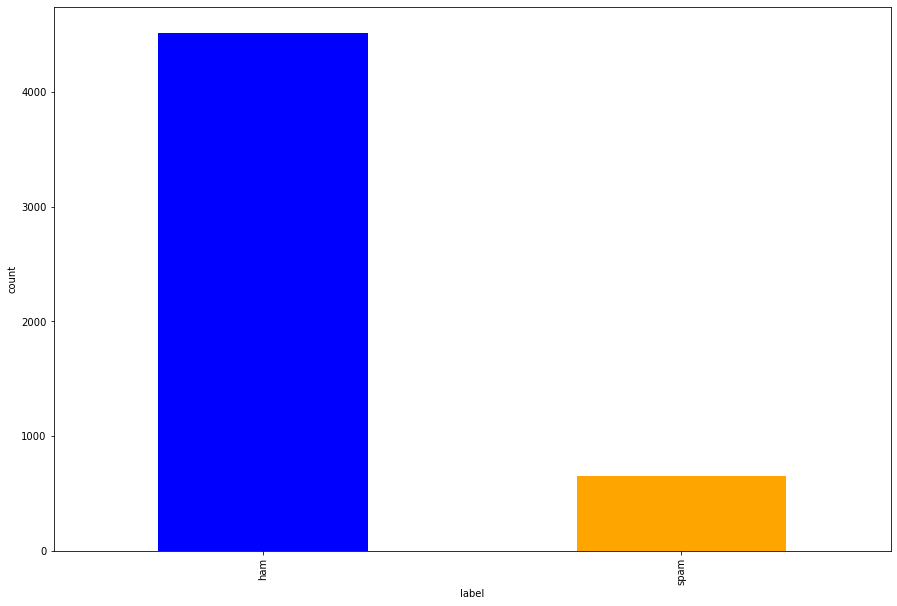

In [128]:
plt.figure(figsize=(15,10))
count_label = pd.value_counts(data['label'], sort=True)
count_label.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [129]:
data['charnum'] = data['text'].apply(len)
data['wordnum'] = data.apply(lambda ent: nltk.word_tokenize(ent['text']), axis=1).apply(len)

In [130]:
data[:20]

,label,text,charnum,wordnum
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,39
6,ham,Even my brother is not like to speak with me. ...,77,18
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,spam,WINNER!! As a valued network customer you have...,157,32
9,spam,Had your mobile 11 months or more? U R entitle...,154,31


In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
charnum,5169.0,78.924163,58.175349,2.0,36.0,60.0,117.0,910.0
wordnum,5169.0,18.454246,13.325668,1.0,9.0,15.0,26.0,220.0


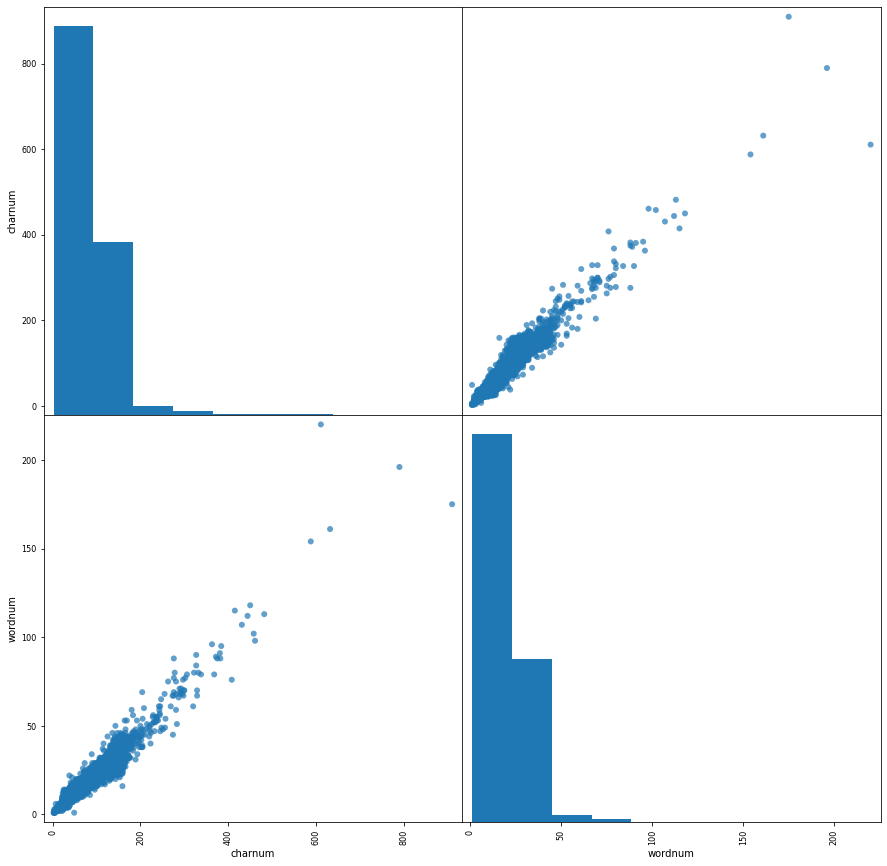

In [132]:
fig = pd.plotting.scatter_matrix(data, figsize=(15,15), marker='o', alpha=0.7)

In [133]:
data = data[data['charnum'] < 400]
data.shape

(5156, 4)

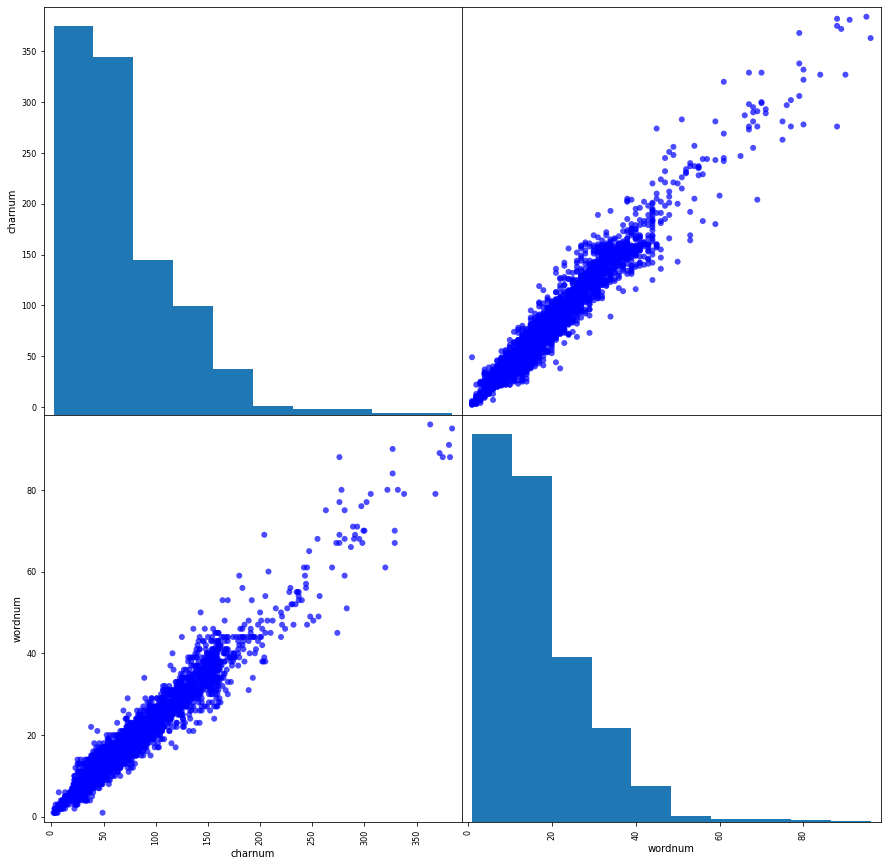

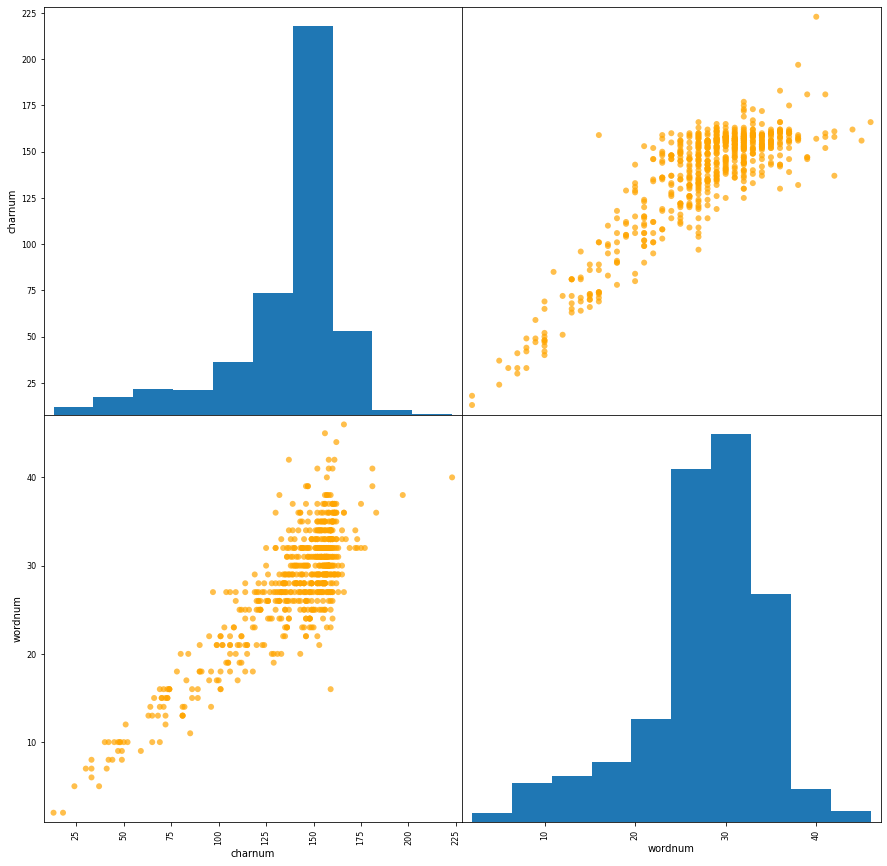

In [134]:
hamfig = pd.plotting.scatter_matrix(data[data.label == 'ham'], figsize=(15,15), marker='o', alpha=0.7, color='blue')
spamfig = pd.plotting.scatter_matrix(data[data.label == 'spam'], figsize=(15,15), marker='o', alpha=0.7, color='orange')
plt.show()

In [145]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def clean_text(text):
    copy = re.sub(r'[^\w\s]', '', text.lower())
    copy = copy.lower()
    copy = copy.split()
    sw = stopwords.words('english')
    copy = ' '.join(x for x in copy if x not in sw and x != '_')
    return copy

def lemmatize_text(text):
    lemmas = [wnl.lemmatize(word, pos=('v')) for word in text]
    return lemmas

In [150]:
data['text'] = data['text'].apply(clean_text)
data['text'][:5]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: text, dtype: object

In [151]:
data['tokens'] = data.apply(lambda ent: nltk.word_tokenize(ent['text']), axis=1)
data['tokens'][:20]

0     [go, jurong, point, crazy, available, bugis, n...
1                        [ok, lar, joking, wif, u, oni]
2     [free, entry, 2, wkly, comp, win, fa, cup, fin...
3         [u, dun, say, early, hor, u, c, already, say]
4     [nah, dont, think, goes, usf, lives, around, t...
5     [freemsg, hey, darling, 3, weeks, word, back, ...
6     [even, brother, like, speak, treat, like, aids...
7     [per, request, melle, melle, oru, minnaminungi...
8     [winner, valued, network, customer, selected, ...
9     [mobile, 11, months, u, r, entitled, update, l...
10    [im, gon, na, home, soon, dont, want, talk, st...
11    [six, chances, win, cash, 100, 20000, pounds, ...
12    [urgent, 1, week, free, membership, 100000, pr...
13    [ive, searching, right, words, thank, breather...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                  [oh, kim, watching]
17    [eh, u, remember, 2, spell, name, yes, v, 

In [152]:
data['lemmas'] = data['tokens'].apply(lemmatize_text)
data['lemmas'][:20]

0     [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entry, 2, wkly, comp, win, fa, cup, fin...
3         [u, dun, say, early, hor, u, c, already, say]
4     [nah, dont, think, go, usf, live, around, though]
5     [freemsg, hey, darling, 3, weeks, word, back, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, melle, melle, oru, minnaminungi...
8     [winner, value, network, customer, select, rec...
9     [mobile, 11, months, u, r, entitle, update, la...
10    [im, gon, na, home, soon, dont, want, talk, st...
11    [six, chance, win, cash, 100, 20000, pound, tx...
12    [urgent, 1, week, free, membership, 100000, pr...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, remember, 2, spell, name, yes, v, 

In [153]:
corpus = []
for ent in data['lemmas']:
    message = ' '.join([word for word in ent])
    corpus.append(message)
    
corpus[:20]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say early hor u c already say',
 'nah dont think go usf live around though',
 'freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send 150 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune',
 'winner value network customer select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hours',
 'mobile 11 months u r entitle update latest colour mobiles camera free call mobile update co free 08002986030',
 'im gon na home soon dont want talk stuff anymore tonight k ive cry enough today',
 'six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 ts

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

tfidf = TfidfVectorizer()
encoder = LabelEncoder()

X = tfidf.fit_transform(corpus).toarray()
y = encoder.fit_transform(data['label'])

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [160]:
classifiers = [    
    RidgeClassifier(alpha=0.05),
    LogisticRegression(C=100, max_iter=50000, n_jobs=-1),
    BernoulliNB(alpha=0.05),                            #my pick
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    RandomForestClassifier(min_samples_split=5, min_samples_leaf=2, n_jobs=-1)
]

models = []

for clf in classifiers:
    mod = clf.__class__.__name__
    clf.fit(X_train, y_train)
    models.append(mod)

Train set accuracy for RidgeClassifier: 100.000%
Test set accuracy for RidgeClassifier: 97.578%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       901
        spam       0.98      0.82      0.90       131

    accuracy                           0.98      1032
   macro avg       0.98      0.91      0.94      1032
weighted avg       0.98      0.98      0.97      1032


Train set accuracy for LogisticRegression: 100.000%
Test set accuracy for LogisticRegression: 97.965%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       901
        spam       0.98      0.85      0.91       131

    accuracy                           0.98      1032
   macro avg       0.98      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032


Train set accuracy for BernoulliNB: 99.758%
Test set accuracy for BernoulliNB: 98.450%
              precision    recall  f1-score   support

    

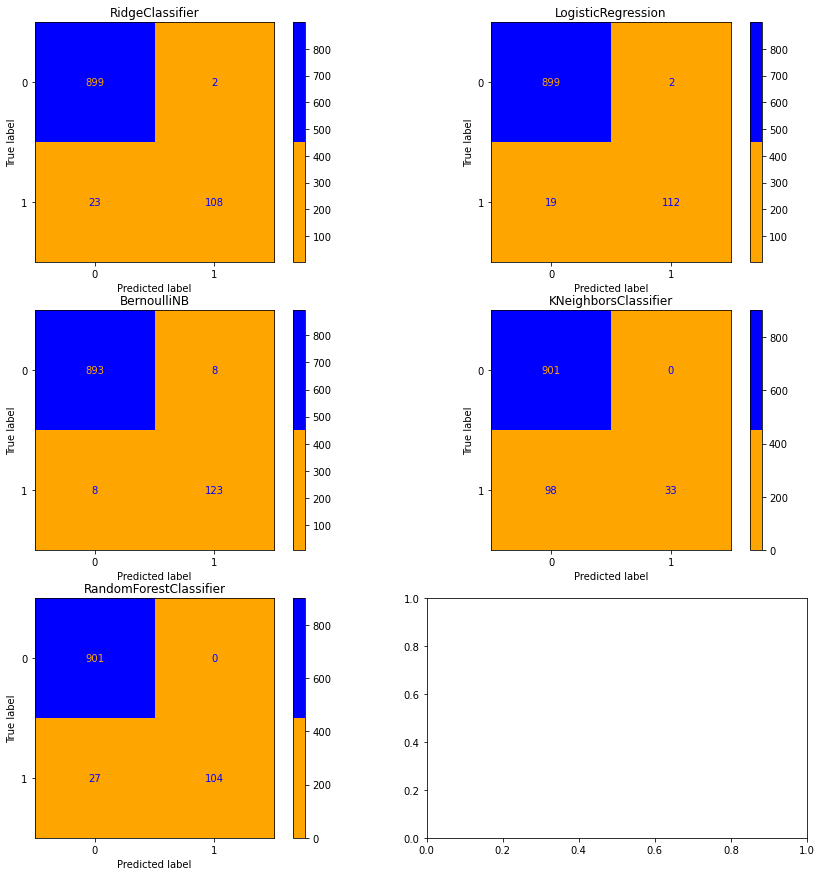

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, recall_score
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

for i, clf, in zip(range(len(models)), classifiers):
    print('Train set accuracy for {}: {:.3f}%'.format(models[i], 100*clf.score(X_train, y_train)))   
    print('Test set accuracy for {}: {:.3f}%'.format(models[i], 100*clf.score(X_test, y_test)))
    print(classification_report(y_test, clf.predict(X_test), target_names=['ham', 'spam']))
    print()
    
for clf, ax in zip(classifiers, axes.flatten()):
    #plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=ListedColormap(['orange', 'blue']))
    cmd = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, cmap=ListedColormap(['orange', 'blue']))
    ax.title.set_text(type(clf).__name__)
    
plt.show()